In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Orly de Jesus Rivera Cruz



# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



----------Primer punto----------
El valor de la derivada con una tolerancia de 1e-8 es de : 9.887511312804927 
El espaciado para lograr esta tolerancia fue de: 0.0005994842503189409

----------Segundo punto----------


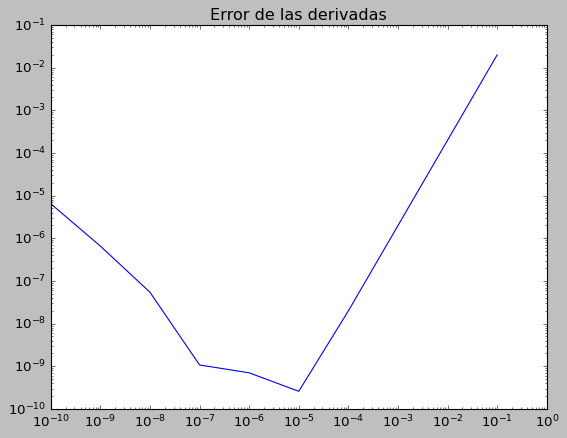

 Despues de un espaciado mayor a 1e-5 los errores numericos de aproximacion o de diferencias
 empiezan a empeorar la derivada, ya que el metodo que usamos tiene una convergencia de h cuadrado.


In [132]:
#Problema 1
print("----------Primer punto----------")

Funcion = lambda x: 3**x                                                  #La funcion pedida en el primer punto

x = 2                                                                     #Punto donde se evaluara la derivada


#-------------------------------------------------------------------------
"""
Funcion 'Derivada'

Entrada:
f : Es una funcion de una variable
x : El valor donde desee evaluar la derivada

Salida:
f_prima_new : El valor de su derivada con una tolerancia de 1e-8
h : Con que espaciado logro esta tolerancia

"""

def Derivada (f , x, tol= 1e-8):

    h_old = 0.1                                                          #Empezamos con un h = 0.1
    f_prima_old = ( f( x + h_old ) - f( x - h_old ) ) / (2*h_old)        #Formula de la derivada centrada

    for h in np.logspace(-2 , -5 , 1000):                                #Tomamos h espaciados logaritmicamente desde 1e-2 ahsta 1e-5
        f_prima_new = ( f( x + h ) - f( x - h ) ) / (2*h)                #Formula de la derivada centrada para nuevos espaciados

        if abs(f_prima_new - f_prima_old) < tol:                         #Comprobamos si cumple la tolerancia
            return f_prima_new , h                                       #Retorna la derivada y el valor del espaciado asociado
        else:
            f_prima_old = f_prima_new                                    #En caso de no cumplir tolerancia reemplazamos el valor de la vieja derivada
    return print("Lamento informarle que no cumplio la tolerancia :c")   #Por si la tolerancia no llega a cumplirse (Obvio que si se cumple)

valor , h = Derivada (Funcion , 2)                                       #Averiguamos la derivada con nuestros valores
print("El valor de la derivada con una tolerancia de 1e-8 es de :",valor,"\nEl espaciado para lograr esta tolerancia fue de:",h)    #Imprimimos

#-------------------------------------------------------------------------

print("\n----------Segundo punto----------")

"""
Funcion 'Derivada_errores'

Entrada:
x : El valor donde desee evaluar la derivada
b : Base de la funcion exponencial

Salida:
Espaciados : El valor de los espaciados utilizados
Errores : Error asociado al espaciado utilizado

"""

def Derivada_errores (x , b):                                   

    f = lambda x: b**x                                          #Definimos la funcion general exponencial
    df = lambda x: (b**x)*(np.log(b))                           #Definimos su derivada analitica

    Espaciados = np.logspace(-1 , -10 , 10)                     #Tomamos puntos logaritmicamente espaciados para el espaciado
    Errores = []                                                #Creamos una lista para guardar los errores
    for h in Espaciados:                                        #Iteramos para obtener los errores en cada espaciado
        f_prima = ( f( x + h ) - f( x - h ) ) / (2*h)           #Formula de la derivada centrada para cada espaciados
        Error = abs(f_prima - df(x))                            #Calculamos el error
        Errores.append(Error)                                   #Guardamos el error
    return Espaciados , Errores

h , error = Derivada_errores(2,3)                               #Evaluamos la funcion para el punto x=2 y la funcion exponencial b=3

#-------------------------------------------------------------------------

plt.style.use("classic")                                        #Estilo bonito

plt.title("Error de las derivadas")                             #Titulo

plt.loglog(h,error)                                             #Grafica logaritmica

plt.show()                                                      #Mostramos

print(" Despues de un espaciado mayor a 1e-5 los errores numericos de aproximacion o de diferencias\n" \
" empiezan a empeorar la derivada, ya que el metodo que usamos tiene una convergencia de h cuadrado.")

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



----------Primer punto----------
El polinomio interpolador de lagrange es de :
             5             4            3     2
-2.132e-13 x + 3.979e-13 x - 1.99e-13 x - 2 x - 2.398e-14 x + 2

----------Segundo punto----------


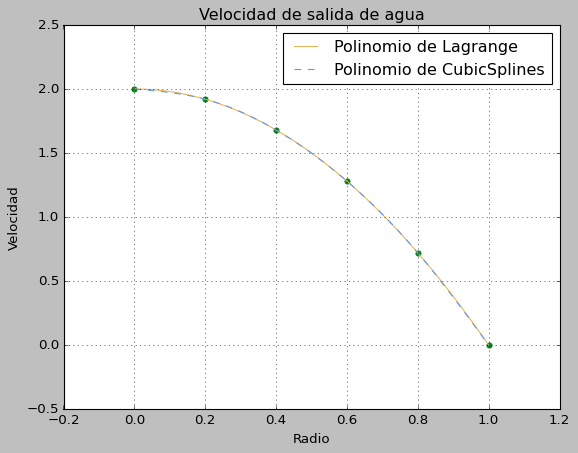


----------Tercer punto----------


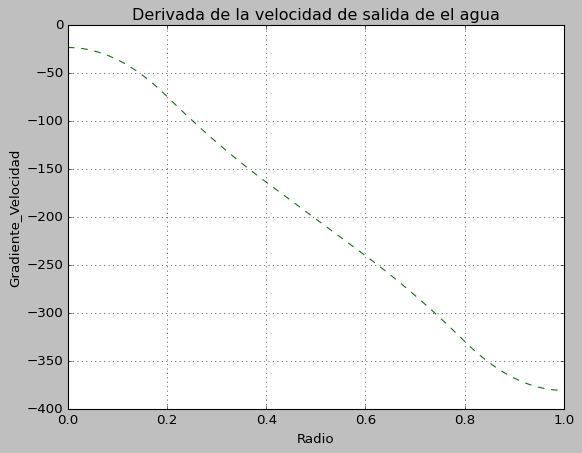


----------Cuarto punto----------


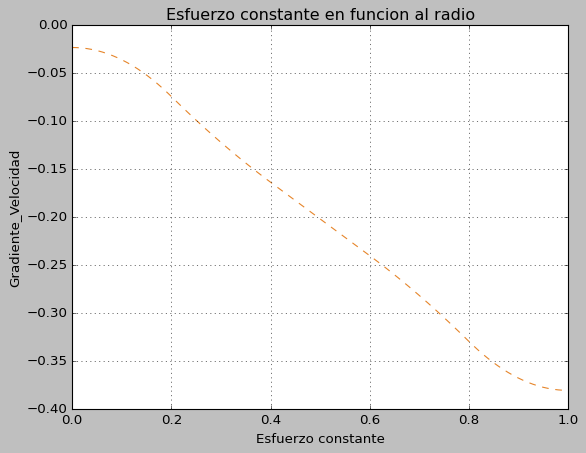

In [152]:
#Problema 2

print("----------Primer punto----------")

r = np.array([0.0 , 0.2 , 0.4 , 0.6 , 0.8 , 1.0])                           #Datos de el radio de el tubo
v = np.array([2.00 , 1.92 , 1.68 , 1.28 , 0.72 , 0.00])                     #Datos de la velocidad para cada radio

#------------------------------------------------------------------------------

Polinomio_Lagrange = lagrange(r , v)                                        #Evaluamos el polinomio de Lagrange para nuestros datos
Polinomio_Cubic = CubicSpline(r , v , bc_type="natural")                    #Evaluamos el polinomio de CubicSplines para nuestros datos

print("El polinomio interpolador de lagrange es de :\n",Polinomio_Lagrange)     #Imprimimos el polinomio de Lagrange asociado a nuestros datos

#------------------------------------------------------------------------------

print("\n----------Segundo punto----------")

r_conti = np.linspace(r.min() , r.max() , 100)                                  #Asignamos un intervalo de datos lineales para evaaluar nuestros funciones

plt.style.use("classic")                                                        #Estilo bonito

plt.plot(r_conti , Polinomio_Lagrange(r_conti) , color="#E7B75E" , label="Polinomio de Lagrange")             #Graficamos el polinomio de Lagrange
plt.plot(r_conti , Polinomio_Cubic(r_conti) , color="#6797DF" , ls="--" , label="Polinomio de CubicSplines")      #Graficamos el polinomio de CubicSplines

plt.title("Velocidad de salida de agua")                #Titulo
plt.xlabel("Radio")                                     #Titulo de el eje X
plt.ylabel("Velocidad")                                 #Titulo de el eje Y

plt.scatter(r,v , color="#06831A")                    #Graficamos en forma de puntos nuestros datos

plt.legend()
plt.grid()                                              #Cuadricula
plt.show()                                              #Mostramos

#------------------------------------------------------------------------------

print("\n----------Tercer punto----------")

Derivada_Gradient = np.gradient(Polinomio_Cubic(r_conti) , 1e-4)            #Calculamos nuestra derivada con np.gradient con el polinomio de CubicSplines con h = 1e-4

plt.title("Derivada de la velocidad de salida de el agua")                  #Titulo
plt.xlabel("Radio")                                                         #Titulo de el eje X
plt.ylabel("Gradiente_Velocidad")                                           #Titulo de el eje Y

plt.plot(r_conti , Derivada_Gradient , ls="--" , color="#127312")        #Graficamos nuestra derivada 

plt.grid()                                                                  #Cuadricula
plt.show()                                                                  #Mostramos

#------------------------------------------------------------------------------

print("\n----------Cuarto punto----------")

u = 0.001                                                                   #Viscosidad dinamica de el fluido

Esfu_Cons = u * Derivada_Gradient                                           #Encontramos los puntos para el esfuerzo constante

plt.title("Esfuerzo constante en funcion al radio")                         #Titulo
plt.xlabel("Esfuerzo constante")                                                         #Titulo en el eje X
plt.ylabel("Gradiente_Velocidad")                                           #Titulo en el eje Y

plt.plot(r_conti , Esfu_Cons , ls="--" , color="#E6852A")                 #Graficamos nuestro esfuerzo constante

plt.grid()                                                                  #Cuadricula
plt.show()                                                                  #Mostramos

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [153]:
#Problema 3

print("----------Primer punto----------")

#-----------------------------------------------------
def Integral_mas_interna(y,x):                              #Calculamos primera la integral mas interna
    f = lambda z : x*y*z                                    #Definimos la funcion principal
    integral , _ = quad(f , 0 , 1-x-y)                      #Integramos con respecto a "z" de 0 a 1-x-y
    return integral                                         #Retornamos una funcion de "x" y "y"

def Integral_intermedia(x):                                 #Calculamos la segunda integral intermedia
    f = lambda y : Integral_mas_interna(y,x)                #Definimos la funcion con respecto a la funcion retornada por "integral_mas_interna"
    integral , _ = quad(f , 0 , 1-x)                        #Integramos con respecto a "y" de 0 a 1-x
    return integral                                         #Retornamos un funcion de "x"

integral , _ = quad(Integral_intermedia , 0 , 1)            #Ahora integramos la funcion retornada por "integral_intermedia" de 0 a 1
print("La integral que representa la masa de nuestro objeto CALCULADA ITERATIVAMENTE CON QUAD es de :",integral)

#-----------------------------------------------------

Densidad = lambda z,y,x : x*y*z

a = 0                                                       #Limite inferior de x
b = 1                                                       #Limite superior de x
g = lambda x : 0                                            #Limite inferior de y
h = lambda x : 1-x                                          #Limite superior de y
q = lambda x , y : 0                                        #Limite inferior de z
r = lambda x , y : 1-x-y                                    #Limite superior de z

integral , _  = tplquad(Densidad , a , b, g , h , q , r)    #Integramos triplemente con tplquad
print("La integral que representa la masa de nuestro objeto CALCULADA CON TPLQUAD es de :",integral)

print("\nComprobamos por los dos metodos que ese es el resultado.")

print("\n----------Segundo punto----------")

Iz = lambda z , y , x : (x**2 + y**2) * (x*y*z)     #Momento de inercia en "z"

a = 0                                               #Limite inferior de x
b = 1                                               #Limite superior de x
g = lambda x : 0                                    #Limite inferior de y
h = lambda x : 1-x                                  #Limite superior de y
q = lambda x , y : 0                                #Limite inferior de z
r = lambda x , y : 1-x-y                            #Limite superior de z

integral , _  = tplquad(Iz , a , b, g , h , q , r)      #Integramos triplemente con tplquad
print("El momento de inercia en z con TPLQUAD es de:",integral)


Ix = lambda z , y ,x : (y**2 + z**2) * (x*y*z)      #Momento de inercia en "x"


a = 0                                               #Limite inferior de x
b = 1                                               #Limite superior de x
g = lambda x : 0                                    #Limite inferior de y
h = lambda x : 1-x                                  #Limite superior de y
q = lambda x , y : 0                                #Limite inferior de z
r = lambda x , y : 1-x-y                            #Limite superior de z

integral , _  = tplquad(Ix , a , b, g , h , q , r)      #Integramos triplemente con tplquad
print("El momento de inercia en x con TPLQUAD es de:",integral)

print("\nAl parecer el objeto es simetrico en esos dos ejes por lo que su momento de inercia es el mismo.")

----------Primer punto----------
La integral que representa la masa de nuestro objeto CALCULADA ITERATIVAMENTE CON QUAD es de : 0.001388888888888889
La integral que representa la masa de nuestro objeto CALCULADA CON TPLQUAD es de : 0.001388888888888889

Comprobamos por los dos metodos que ese es el resultado.

----------Segundo punto----------
El momento de inercia en z con TPLQUAD es de: 0.00029761904761904765
El momento de inercia en x con TPLQUAD es de: 0.00029761904761904765

Al parecer el objeto es simetrico en esos dos ejes por lo que su momento de inercia es el mismo.
